In [1]:
 # mount GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#in case previos cell does not work move one folder at a time....for me the cell above stopped working at some point!
%cd 'drive'
%cd 'My Drive'
%cd 'Colab Notebooks'
%cd 'Adversarial_LSBGs'
%cd 'AdversarialStudies-master'
%ls

/content/drive
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/Adversarial_LSBGs
/content/drive/My Drive/Colab Notebooks/Adversarial_LSBGs/AdversarialStudies-master
Adversarial_Tests.ipynb               LSBG1613148914.txt
check_coverage.sh                     LSBG1613149120.txt
cleanup.sh                            LSBG1613149286.txt
dset_viz_attacked_stargalaxy.py       LSBG1613149647.txt
dset_viz_stargalaxy.py                LSBG1613149961.txt
evts_0_010.pdf                        LSBG1613150472.txt
fgsm_0_000.hdf5                       LSBG1613150586.txt
fgsm_0_010.hdf5                       LSBG_ckpt.tar
fgsm_0_050.hdf5                       LSBG_evts_0_000.pdf
fgsm_attack_stargalaxy.py             LSBG_evts_0_010.pdf
log_attack_LSBG1612999766.txt         LSBG_evts_0_050.pdf
log_attack_LSBG1613155894.txt         LSBG_Outputs/
log_attack_star_galaxy1612905554.txt  models.py
log_star_galaxy1612810053.txt         msg.py
log_star_

## Plotting some files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
img = np.load('../LSBG_Datasets/X_test.npy')
label = np.load('../LSBG_Datasets/y_test.npy')

In [38]:
lsbg = []
artifact = []
for i in range(len(img)):
  if label[i] == 0:
    artifact.append(img[i])
  else:
    lsbg.append(img[i])

In [39]:
LSBG = np.stack(lsbg)
Art = np.stack(artifact)

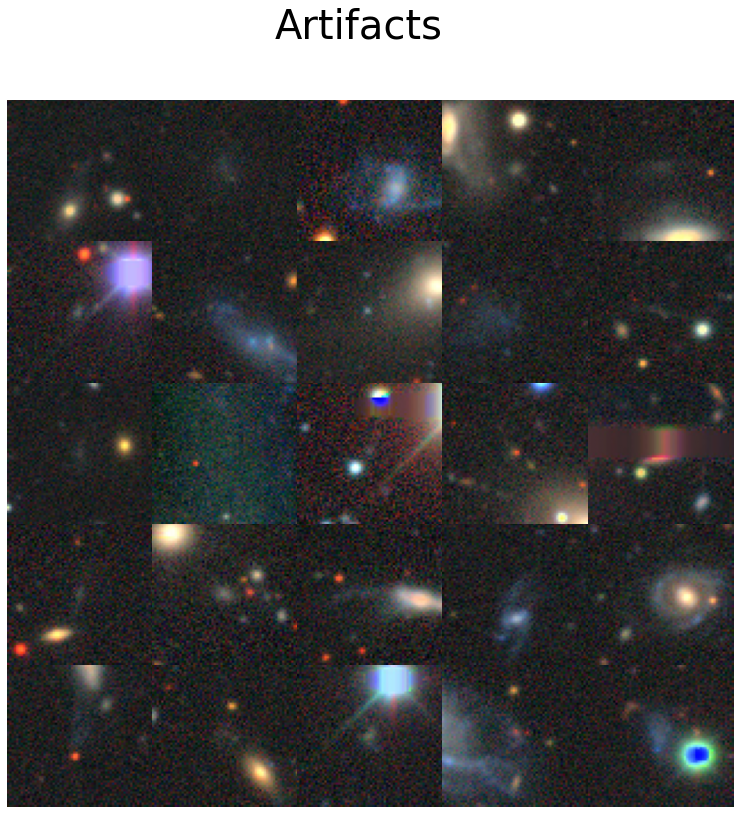

In [47]:
example_list=Art[:25,:,:]

fig1=plt.figure(figsize=(13,13))
fig1.suptitle("Artifacts",fontsize=40)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.imshow(example_list[i], aspect='auto')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

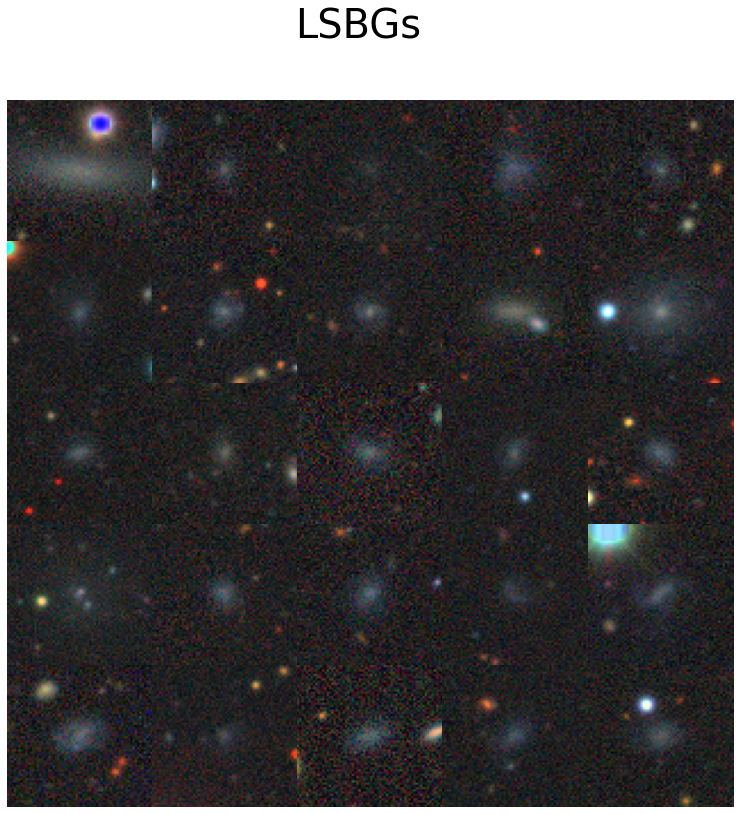

In [46]:
example_list=LSBG[:25,:,:]

fig1=plt.figure(figsize=(13,13))
fig1.suptitle("LSBGs",fontsize=40)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.imshow(example_list[i], aspect='auto')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

## Making LSBG hdf5 files

In [ ]:
!pip install h5py

In [ ]:
import numpy as np
import h5py
h5f = h5py.File('star_galaxy_data/new_files/stargalaxy_real_ptflt_test.hdf5','r')

In [ ]:
print(list(h5f.keys()))

['catalog', 'imageset']


In [ ]:
#labels
h5f['catalog'][:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int32)

In [ ]:
#images
np.shape(h5f['catalog'])

(2500,)

In [ ]:
#images
np.shape(h5f['imageset'][0])

(3, 48, 48)

In [ ]:
#can we package our files to be the same way?

In [ ]:
import numpy as np
import h5py

In [ ]:
img1 = np.load('../LSBG_Datasets/X_train.npy')
img2 = np.load('../LSBG_Datasets/X_test.npy')
img3 = np.load('../LSBG_Datasets/X_val.npy')
label1 = np.load('../LSBG_Datasets/y_train.npy')
label2 = np.load('../LSBG_Datasets/y_test.npy')
label3 = np.load('../LSBG_Datasets/y_val.npy')

In [ ]:
img1 = np.moveaxis(img1, -1, 1)
img2 = np.moveaxis(img2, -1, 1)
img3 = np.moveaxis(img3, -1, 1)

In [ ]:
print(np.shape(img1), np.shape(label1))

(30000, 3, 64, 64) (30000,)


In [ ]:
def save_to_hdf5(file_path, images, labels):
  with h5py.File(file_path, 'w') as hf:
    dset_y_train = hf.create_dataset('catalog', data=labels, shape=np.shape(labels))
    dset_x_train = hf.create_dataset('imageset', data=images, shape=np.shape(images))
  hf.close() 

In [ ]:
file_path_train = '../LSBG_Datasets/train.hdf5'
file_path_test = '../LSBG_Datasets/test.hdf5'
file_path_val = '../LSBG_Datasets/val.hdf5'

In [ ]:
save_to_hdf5(file_path_train,img1,label1)
save_to_hdf5(file_path_test,img2,label2)
save_to_hdf5(file_path_val,img3,label3)

In [ ]:
h5f = h5py.File('../LSBG_Datasets/train.hdf5','r')
print(list(h5f.keys()))

['catalog', 'imageset']


In [ ]:
#images
np.shape(h5f['imageset'][0])

(3, 64, 64)

In [ ]:
with h5py.File('../LSBG_Datasets/test_new.hdf5', 'w') as hf:
    dset_y_train = hf.create_dataset('catalog', data=labels, shape=(40000,))
    dset_x_train = hf.create_dataset('imageset', data=images, shape=(40000, 3, 64, 64))
hf.close()    

In [ ]:
h5f = h5py.File('../LSBG_Datasets/test_new.hdf5','r')
print(list(h5f.keys()))

['catalog', 'imageset']


In [ ]:
h5f['catalog'][:10]

array([1., 0., 0., 0., 1., 1., 1., 0., 1., 0.])

In [ ]:
#images
np.shape(h5f['catalog'])

(40000,)

In [ ]:
#images
np.shape(h5f['imageset'][0])

(3, 64, 64)

In [ ]:
#SUCCESS!